## Formula 1 Dataset introduce

Formula 1 is an international car racing competition. 
Drivers from around the world compete for a title, and 
the races are held in various countries, making it a 
global event.

Each driver is part of a team called a “Constructor,” 
typically sponsored by a specific car manufacturer.

## All Questions:

**a) Which three constructors had the highest number of total points between 1981 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

**b) Which three constructors had the highest number of total points between 2001 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

**c) How did the rankings change across the two time periods?**

**d) How many different drivers did Ferrari have between 1981 and 2020?**

**e) What was the best year for Ferrari between 1981 and 2020?**

In [1]:
import numpy as np
import pandas as pd

**question a) Which three constructors had the highest number of total points between 1981 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

In [2]:
# import data
constructor_results_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/constructor_results.csv")
constructor_information_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/constructors.csv")
race_information_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/races.csv")

# data cleaning
constructor_information = constructor_information_raw.rename(columns={'name':'constructor_name'})
race_information = race_information_raw.rename(columns={'name':'race_name'})

In [3]:
# find race from 1981-2020
race_information_from_1981_to_2020 = race_information.query("(year >= 1981) and (year <= 2020)")
race_information_from_1981_to_2020

,raceId,year,round,circuitId,race_name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,http://en.wikipedia.org/wiki/2020_Emilia_Romag...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,http://en.wikipedia.org/wiki/2020_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,14:10:00,http://en.wikipedia.org/wiki/2020_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,http://en.wikipedia.org/wiki/2020_Sakhir_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [4]:
constructor_results_from_1981_to_2020 = pd.merge(constructor_results_raw,# each constructor's points
                                                 race_information_from_1981_to_2020[["raceId","year"]],# here is race id from 1981 to 2020
                                                 on = "raceId",
                                                 how = "right")#save all the race result from 1981 to 2020
constructor_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
0,3823,1,23,18.0,\N,2009
1,3824,1,1,0.0,\N,2009
2,3825,1,7,11.0,\N,2009
3,3826,1,4,4.0,\N,2009
4,3827,1,3,3.0,\N,2009
...,...,...,...,...,...,...
8573,16225,1047,211,1.0,\N,2020
8574,16226,1047,51,0.0,\N,2020
8575,16227,1047,6,0.0,\N,2020
8576,16228,1047,3,0.0,\N,2020


In [5]:
total_points_per_constructor_from_1981_to_2020 = constructor_results_from_1981_to_2020.groupby('constructorId')['points'].sum().reset_index()
total_points_per_constructor_from_1981_to_2020 = total_points_per_constructor_from_1981_to_2020.sort_values('points', ascending=False)
total_points_per_constructor_from_1981_to_2020

,constructorId,points
5,6,7374.0
56,131,5685.0
0,1,5229.5
8,9,5043.5
2,3,3355.0
...,...,...
37,38,0.0
35,36,0.0
12,13,0.0
13,14,0.0


In [6]:
average_points_from_1981_to_2020 = total_points_per_constructor_from_1981_to_2020['points'].mean()
print(average_points_from_1981_to_2020)

532.2388059701492


In [7]:

constructor_name_point_from_1981_to_2020 = pd.merge(total_points_per_constructor_from_1981_to_2020,# each constructor's total points
                                  constructor_information[["constructorId","constructor_name"]],# merge constructorid with their name
                                                 on = "constructorId",
                                                 how = "left")
constructor_name_point_from_1981_to_2020

,constructorId,points,constructor_name
0,6,7374.0,Ferrari
1,131,5685.0,Mercedes
2,1,5229.5,McLaren
3,9,5043.5,Red Bull
4,3,3355.0,Williams
...,...,...,...
62,38,0.0,Andrea Moda
63,36,0.0,Fondmetal
64,13,0.0,MF1
65,14,0.0,Spyker MF1


In [8]:
constructor_name_point_from_1981_to_2020['average_points'] = average_points_from_1981_to_2020
constructor_name_point_from_1981_to_2020

,constructorId,points,constructor_name,average_points
0,6,7374.0,Ferrari,532.238806
1,131,5685.0,Mercedes,532.238806
2,1,5229.5,McLaren,532.238806
3,9,5043.5,Red Bull,532.238806
4,3,3355.0,Williams,532.238806
...,...,...,...,...
62,38,0.0,Andrea Moda,532.238806
63,36,0.0,Fondmetal,532.238806
64,13,0.0,MF1,532.238806
65,14,0.0,Spyker MF1,532.238806


**Answer a) Which three constructors had the highest number of total points between 1981 and 2020?**  
Ferrari, Mercedes, McLaren
- How many total points did each of them get?  
Ferrari 7374, Mercedes 5685, McLaren 5229
- How do the total number of points for each constructor compare to the average across constructors?
use a bar chart to answer

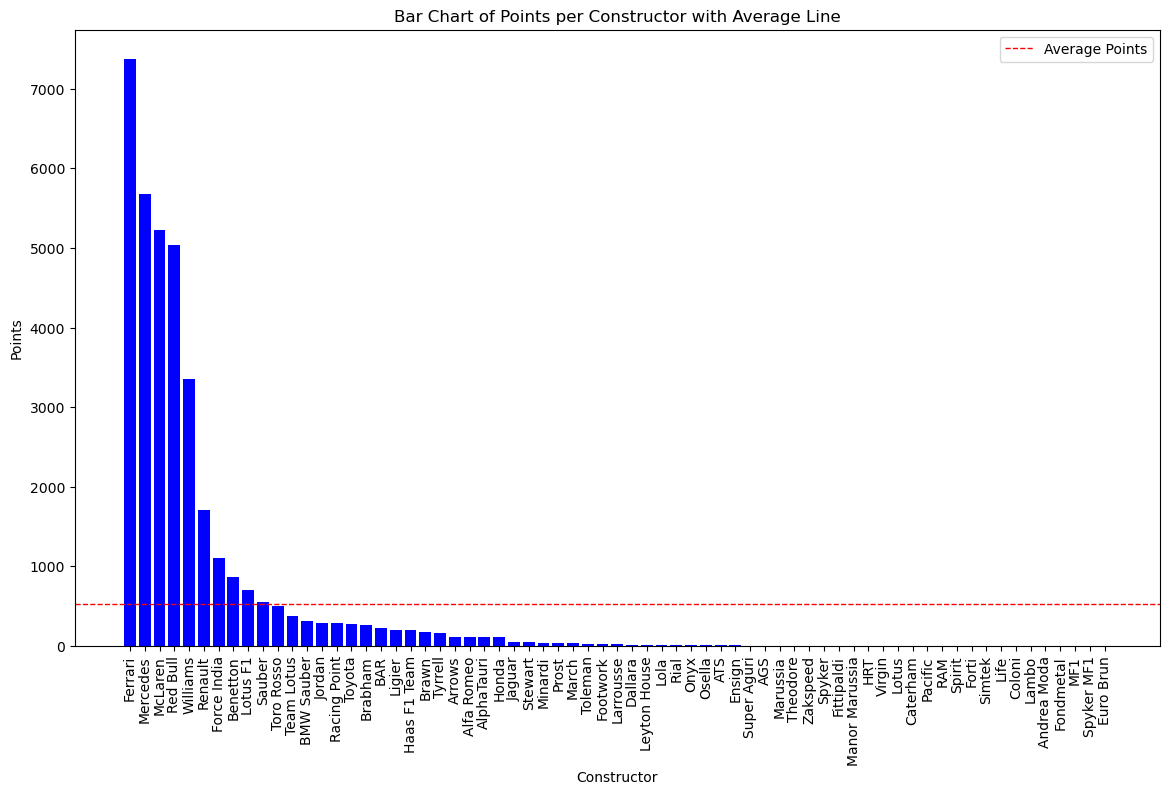

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.bar(constructor_name_point_from_1981_to_2020['constructor_name'], constructor_name_point_from_1981_to_2020['points'], color='blue')

# an average line across the chart
plt.axhline(constructor_name_point_from_1981_to_2020['average_points'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Points')

# titles of the chart
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.title('Bar Chart of Points per Constructor with Average Line')
plt.xticks(rotation=90)  # rotate x-axis labels to avoid overlap
plt.legend()


plt.show()

**question b) Which three constructors had the highest number of total points between 2001 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

In [10]:
# find race from 2001 to 2020
race_information_from_2001_to_2020 = race_information.query("(year >= 2001) and (year <= 2020)")

# get all the constructor ace result from 2001 to 2020
constructor_results_from_2001_to_2020 = pd.merge(constructor_results_raw,# each constructor's points
                                                 race_information_from_2001_to_2020[["raceId","year"]],# here is race id from 2001 to 2020
                                                 on = "raceId",
                                                 how = "right")#save all the race result from 2001 to 2020

# get every constructor's total point from 2001 to 2020
total_points_per_constructor_from_2001_to_2020 = constructor_results_from_2001_to_2020.groupby('constructorId')['points'].sum().reset_index()
total_points_per_constructor_from_2001_to_2020.sort_values('points', ascending=False)

# get the average point of constructor
average_points_from_2001_to_2020 = total_points_per_constructor_from_2001_to_2020['points'].mean()
print(average_points_from_2001_to_2020)

786.0142857142857


In [11]:
# merge constructor's total point with their name
constructor_name_point_from_2001_to_2020 = pd.merge(total_points_per_constructor_from_2001_to_2020,# each constructor's total points
                                  constructor_information[["constructorId","constructor_name"]],# merge constructorid with their name
                                                 on = "constructorId",
                                                 how = "left")
constructor_name_point_from_2001_to_2020['average_points'] = average_points_from_2001_to_2020
constructor_name_point_from_2001_to_2020 = constructor_name_point_from_2001_to_2020.sort_values('points', ascending=False)

In [12]:
constructor_name_point_from_2001_to_2020

,constructorId,points,constructor_name,average_points
5,6,5862.0,Ferrari,786.014286
24,131,5685.0,Mercedes,786.014286
8,9,5043.5,Red Bull,786.014286
0,1,3284.0,McLaren,786.014286
2,3,1535.5,Williams,786.014286
3,4,1465.0,Renault,786.014286
9,10,1098.0,Force India,786.014286
30,208,706.0,Lotus F1,786.014286
4,5,500.0,Toro Rosso,786.014286
14,15,467.0,Sauber,786.014286


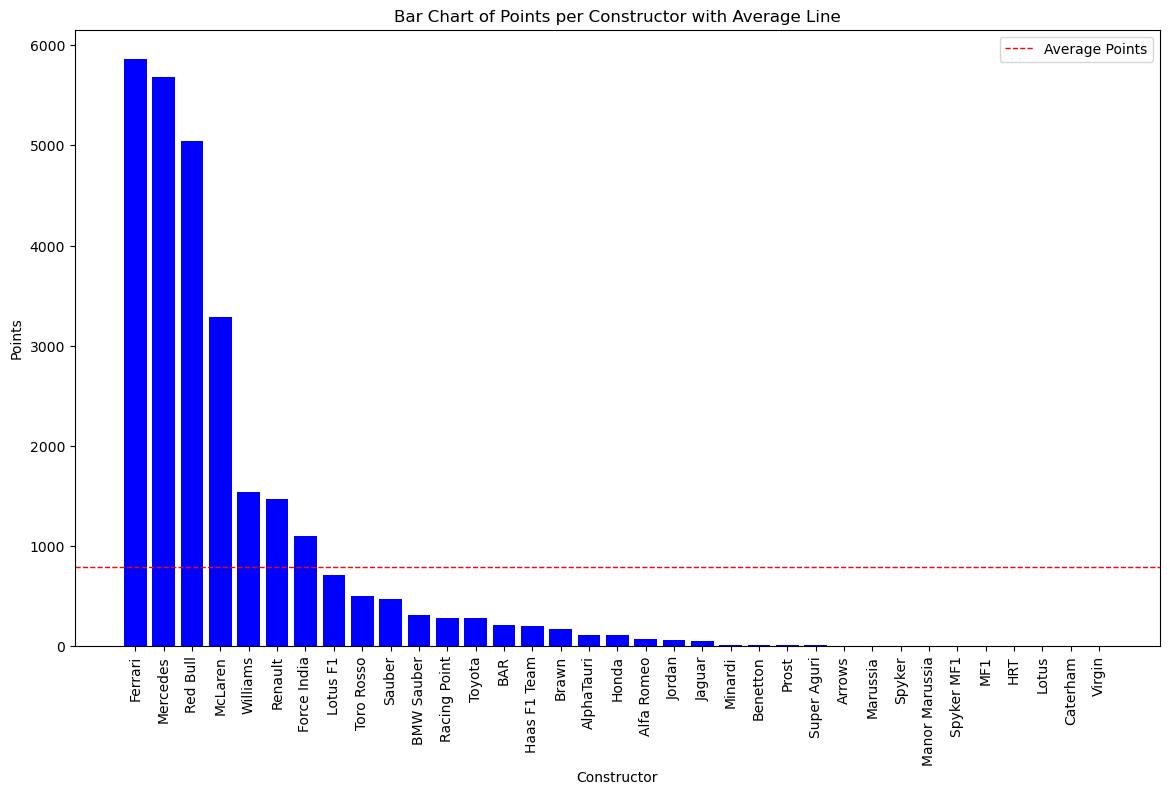

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.bar(constructor_name_point_from_2001_to_2020['constructor_name'], constructor_name_point_from_2001_to_2020['points'], color='blue')

# an average line across the chart
plt.axhline(constructor_name_point_from_2001_to_2020['average_points'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Points')

# titles of the chart
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.title('Bar Chart of Points per Constructor with Average Line')
plt.xticks(rotation=90)  # rotate x-axis labels to avoid overlap
plt.legend()


plt.show()

**Answer b) Which three constructors had the highest number of total points between 2001 and 2020?**  
Ferrari, Mercedes, Red Bull
- How many total points did each of them get?  
5862, 5685, 5043
- How do the total number of points for each constructor compare to the average across constructors?
draw a picture to answer

**question c) How did the rankings change across the two time periods?**

In [14]:
# add rank to dataset
constructor_name_point_from_1981_to_2020['rank_1981-2020'] = constructor_name_point_from_1981_to_2020['points'].rank(method='dense', ascending=False)
# data cleaning
constructor_point_from_1981_to_2020 = constructor_name_point_from_1981_to_2020.rename(columns={'points':'points_1981-2020','average_points':'avg_points_1981-2020'})

In [15]:
# add rank to dataset
constructor_name_point_from_2001_to_2020['rank_2001-2020'] = constructor_name_point_from_2001_to_2020['points'].rank(method='dense', ascending=False)
# data cleaning
constructor_point_from_2001_to_2020 = constructor_name_point_from_2001_to_2020.rename(columns={'points':'points_2001-2020','average_points':'avg_points_2001-2020'})


In [16]:
constructor_point_from_1981_to_2020

,constructorId,points_1981-2020,constructor_name,avg_points_1981-2020,rank_1981-2020
0,6,7374.0,Ferrari,532.238806,1.0
1,131,5685.0,Mercedes,532.238806,2.0
2,1,5229.5,McLaren,532.238806,3.0
3,9,5043.5,Red Bull,532.238806,4.0
4,3,3355.0,Williams,532.238806,5.0
...,...,...,...,...,...
62,38,0.0,Andrea Moda,532.238806,43.0
63,36,0.0,Fondmetal,532.238806,43.0
64,13,0.0,MF1,532.238806,43.0
65,14,0.0,Spyker MF1,532.238806,43.0


In [17]:
constructor_point_from_2001_to_2020

,constructorId,points_2001-2020,constructor_name,avg_points_2001-2020,rank_2001-2020
5,6,5862.0,Ferrari,786.014286,1.0
24,131,5685.0,Mercedes,786.014286,2.0
8,9,5043.5,Red Bull,786.014286,3.0
0,1,3284.0,McLaren,786.014286,4.0
2,3,1535.5,Williams,786.014286,5.0
3,4,1465.0,Renault,786.014286,6.0
9,10,1098.0,Force India,786.014286,7.0
30,208,706.0,Lotus F1,786.014286,8.0
4,5,500.0,Toro Rosso,786.014286,9.0
14,15,467.0,Sauber,786.014286,10.0


In [18]:
# merge constructor's rank & point of 20years/40years
rank_change = pd.merge(constructor_point_from_1981_to_2020, 
                     constructor_point_from_2001_to_2020, 
                     on=['constructorId', 'constructor_name'],
                     how='outer')

rank_change


,constructorId,points_1981-2020,constructor_name,avg_points_1981-2020,rank_1981-2020,points_2001-2020,avg_points_2001-2020,rank_2001-2020
0,1,5229.5,McLaren,532.238806,3.0,3284.0,786.014286,4.0
1,2,308.0,BMW Sauber,532.238806,13.0,308.0,786.014286,11.0
2,3,3355.0,Williams,532.238806,5.0,1535.5,786.014286,5.0
3,4,1710.0,Renault,532.238806,6.0,1465.0,786.014286,6.0
4,5,500.0,Toro Rosso,532.238806,11.0,500.0,786.014286,9.0
...,...,...,...,...,...,...,...,...
62,208,706.0,Lotus F1,532.238806,9.0,706.0,786.014286,8.0
63,209,1.0,Manor Marussia,532.238806,42.0,1.0,786.014286,26.0
64,210,200.0,Haas F1 Team,532.238806,20.0,200.0,786.014286,15.0
65,211,283.0,Racing Point,532.238806,15.0,283.0,786.014286,12.0


**answer C：Create a bar chart to compare the differences between 1981-2020 and 2001-2020 points.** 
- The two bars should overlap rather than stack on top of each other since 1981-2020 and 2001-2020 partially overlap in time. 
- Only show the top 10 ranks of 1981-2020 and the top 10 ranks of 2001-2020.
Sorted by the 1981-2020 rankings.

- Display the rank at the top of each bar.
- If the 2001-2020 rank has decreased, mark the rank in red; if it has increased, mark it in green (consider adding arrows next to the ranks).


**My thought:** 
- To show the change in points, a stacked chart showing each constructor's points from 1981-2000 and 2001-2020 would be more appropriate (stack 2001-2020 on top).  
- However, since the task requires showing the rank differences, place the two points side by side.


/var/folders/t2/21wy42zs3vqf4r_24_d7j4nc0000gn/T/ipykernel_17156/1846204751.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, top_10_combined['points_1981-2020'][i], f'{int(rank_1981)}', ha='center', va='bottom', fontsize=10)
/var/folders/t2/21wy42zs3vqf4r_24_d7j4nc0000gn/T/ipykernel_17156/1846204751.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + bar_width, top_10_combined['points_2001-2020'][i], f'{int(rank_2001)}', ha='center', va='bottom', fontsize=10, color=color)


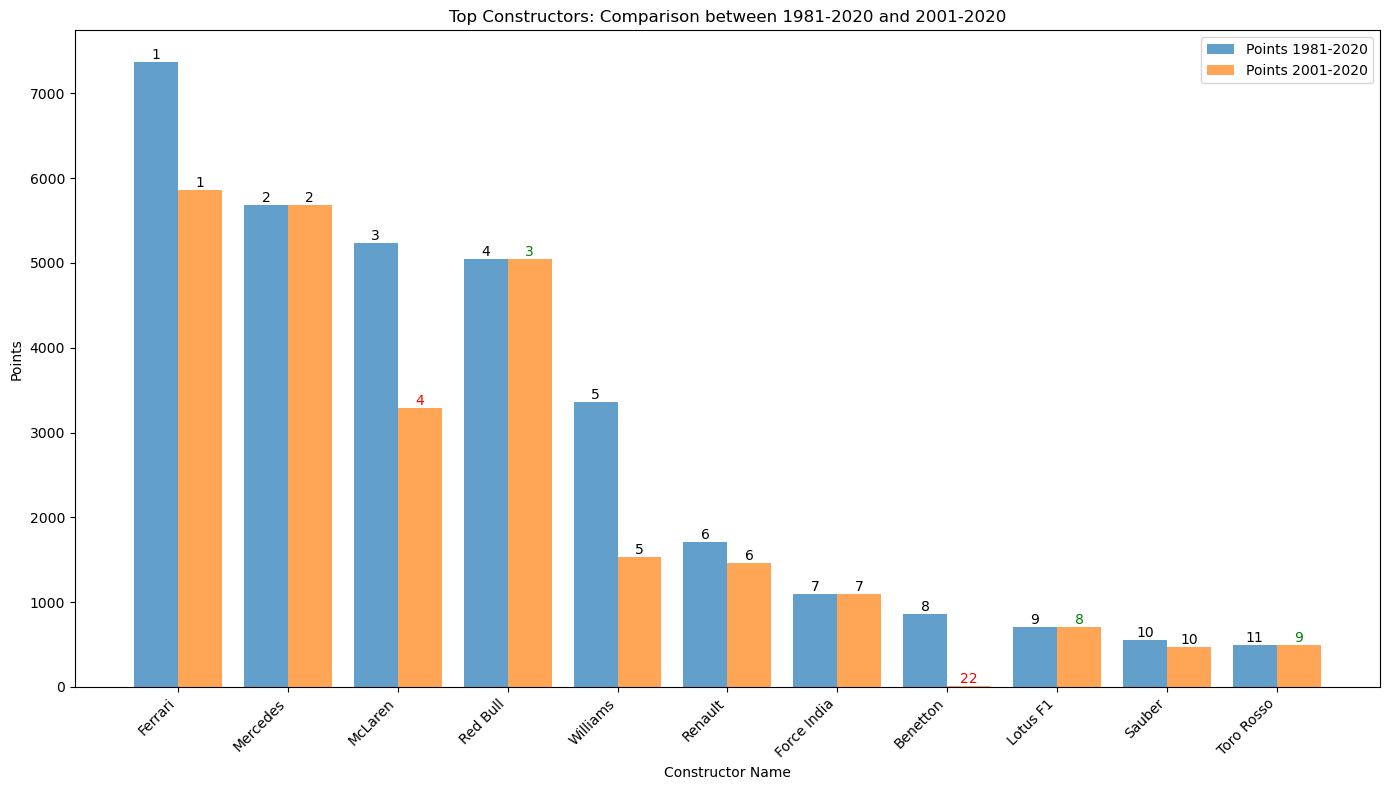

In [19]:
# filter 1981-2020 top 10 constructors
top_10_1981_2020 = rank_change.sort_values(by='rank_1981-2020').head(10)

# filter 2001-2020 top 10 constructors
top_10_2001_2020 = rank_change.sort_values(by='rank_2001-2020').head(10)

# combine the two sets, remove duplicates
top_10_combined = pd.concat([top_10_1981_2020, top_10_2001_2020]).drop_duplicates()

# set constructor names as index for plotting
top_10_combined.set_index('constructor_name', inplace=True)

# set figure size
plt.figure(figsize=(14, 8))

# set bar width and position
bar_width = 0.4
index = np.arange(len(top_10_combined))

# plot the two bars side by side (overlapping)
bar1 = plt.bar(index, top_10_combined['points_1981-2020'], bar_width, label='Points 1981-2020', alpha=0.7)
bar2 = plt.bar(index + bar_width, top_10_combined['points_2001-2020'], bar_width, label='Points 2001-2020', alpha=0.7)

# add rank labels on top of each bar with conditional coloring
for i, (rank_1981, rank_2001) in enumerate(zip(top_10_combined['rank_1981-2020'], top_10_combined['rank_2001-2020'])):
    # Adding rank for 1981-2020 in default color (black)
    plt.text(i, top_10_combined['points_1981-2020'][i], f'{int(rank_1981)}', ha='center', va='bottom', fontsize=10)
    
    # Determine color based on rank change: red if rank increased, green if decreased
    color = 'red' if rank_2001 > rank_1981 else 'green' if rank_2001 < rank_1981 else 'black'
    # adding rank for 2001-2020 with conditional color
    plt.text(i + bar_width, top_10_combined['points_2001-2020'][i], f'{int(rank_2001)}', ha='center', va='bottom', fontsize=10, color=color)

# labels and titles
plt.title('Top Constructors: Comparison between 1981-2020 and 2001-2020')
plt.xlabel('Constructor Name')
plt.ylabel('Points')
plt.xticks(index + bar_width / 2, top_10_combined.index, rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()


**question d) How many different drivers did Ferrari have between 1981 and 2020?**

In [20]:
# import data
results_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/results.csv")
results_raw

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [21]:
results_from_1981_to_2020 = pd.merge(results_raw[['resultId','raceId','driverId','constructorId']],# each constructor's points
                                     race_information_from_1981_to_2020[["raceId","year"]],# here is race id from 1981 to 2020
                                     on = "raceId",
                                     how = "right")#save all the race result from 1981 to 2020
results_from_1981_to_2020

,resultId,raceId,driverId,constructorId,year
0,7554,1,18,23,2009
1,7555,1,22,23,2009
2,7556,1,15,7,2009
3,7557,1,10,7,2009
4,7558,1,4,4,2009
...,...,...,...,...,...
16645,24961,1047,841,51,2020
16646,24962,1047,849,3,2020
16647,24963,1047,825,210,2020
16648,24964,1047,850,210,2020


In [22]:
# find ferrari's id
ferrari_constructor_id = constructor_information_raw[constructor_information_raw['name'] == 'Ferrari']['constructorId'].values[0]
ferrari_constructor_id

6

In [23]:
# pick ferrari's result
ferrari_results = results_from_1981_to_2020[results_from_1981_to_2020['constructorId'] == ferrari_constructor_id]
ferrari_results

,resultId,raceId,driverId,constructorId,year
14,7568,1,8,6,2009
15,7569,1,13,6,2009
28,7582,2,13,6,2009
33,7587,2,8,6,2009
49,7603,3,8,6,2009
...,...,...,...,...,...
16602,24918,1045,20,6,2020
16621,24937,1046,20,6,2020
16629,24945,1046,844,6,2020
16642,24958,1047,844,6,2020


In [24]:
# find the unique driver IDs and count them   (using nunique())
unique_drivers = ferrari_results['driverId'].nunique()
unique_drivers

25

**answer d) How many different drivers did Ferrari have between 1981 and 2020?**
- answer:25

**question e) What was the best year for Ferrari between 1981 and 2020?**

In [25]:
ferrari_results

,resultId,raceId,driverId,constructorId,year
14,7568,1,8,6,2009
15,7569,1,13,6,2009
28,7582,2,13,6,2009
33,7587,2,8,6,2009
49,7603,3,8,6,2009
...,...,...,...,...,...
16602,24918,1045,20,6,2020
16621,24937,1046,20,6,2020
16629,24945,1046,844,6,2020
16642,24958,1047,844,6,2020


In [26]:
ferrari_results_from_1981_to_2020 = constructor_results_from_1981_to_2020[constructor_results_from_1981_to_2020['constructorId'] == ferrari_constructor_id]
ferrari_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
9,3832,1,6,0.0,\N,2009
16,3839,2,6,0.0,\N,2009
26,3849,3,6,0.0,\N,2009
34,3857,4,6,3.0,\N,2009
43,3866,5,6,3.0,\N,2009
...,...,...,...,...,...,...
8531,16183,1043,6,10.0,\N,2020
8540,16192,1044,6,27.0,\N,2020
8553,16205,1045,6,1.0,\N,2020
8564,16216,1046,6,0.0,\N,2020


In [27]:
# group the data by 'year' and sum the 'points' for each year
ferrari_points_by_year = ferrari_results_from_1981_to_2020.groupby('year')['points'].sum()
ferrari_points_sorted = ferrari_points_by_year.sort_values(ascending=False)
ferrari_points_sorted

year
2018    571.0
2017    522.0
2019    504.0
2015    428.0
2012    400.0
2016    398.0
2010    396.0
2011    375.0
2013    354.0
2004    262.0
2002    221.0
2014    216.0
2007    204.0
2006    201.0
2001    179.0
2008    172.0
2000    170.0
2003    158.0
1998    133.0
2020    131.0
1999    128.0
1990    110.0
1997    102.0
2005    100.0
1983     89.0
1985     82.0
1982     74.0
1995     73.0
1994     71.0
1996     70.0
2009     70.0
1988     65.0
1989     59.0
1984     57.5
1991     55.5
1987     53.0
1986     37.0
1981     34.0
1993     28.0
1992     21.0
Name: points, dtype: float64

In [28]:
constructor_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
0,3823,1,23,18.0,\N,2009
1,3824,1,1,0.0,\N,2009
2,3825,1,7,11.0,\N,2009
3,3826,1,4,4.0,\N,2009
4,3827,1,3,3.0,\N,2009
...,...,...,...,...,...,...
8573,16225,1047,211,1.0,\N,2020
8574,16226,1047,51,0.0,\N,2020
8575,16227,1047,6,0.0,\N,2020
8576,16228,1047,3,0.0,\N,2020


In [29]:
# calculate the total points of each constructor every year
constructor_yearly_total_points = constructor_results_from_1981_to_2020.groupby(['constructorId', 'year']).agg(constructor_yearly_total_point=('points', 'sum')).reset_index()
constructor_yearly_total_points

,constructorId,year,constructor_yearly_total_point
0,1,1981,28.0
1,1,1982,69.0
2,1,1983,34.0
3,1,1984,143.5
4,1,1985,90.0
...,...,...,...
512,210,2019,28.0
513,210,2020,3.0
514,211,2019,73.0
515,211,2020,210.0


In [30]:
# merge the total points with the original data
constructor_yearly_totalPoint = pd.merge(constructor_results_from_1981_to_2020, constructor_yearly_total_points, on=['constructorId', 'year'])
constructor_yearly_totalPoint = constructor_yearly_totalPoint[['constructorId', 'year', 'constructor_yearly_total_point']]
constructor_yearly_totalPoint 

,constructorId,year,constructor_yearly_total_point
0,23,2009,172.0
1,1,2009,71.0
2,7,2009,59.5
3,4,2009,26.0
4,3,2009,34.5
...,...,...,...
8573,211,2020,210.0
8574,51,2020,8.0
8575,6,2020,131.0
8576,3,2020,0.0


In [31]:
# rank by year's point
constructor_yearly_totalPoint = constructor_yearly_totalPoint.sort_values(by=['year', 'constructor_yearly_total_point'], ascending=[True, False])

# add yearly rank to dataframe
constructor_yearly_totalPoint['rank'] = constructor_yearly_totalPoint.groupby('year')['constructor_yearly_total_point'].rank(ascending=False, method='dense')

#drop duplicate rows
constructor_yearly_totalPoint = constructor_yearly_totalPoint.drop_duplicates()

constructor_yearly_totalPoint


,constructorId,year,constructor_yearly_total_point,rank
6233,3,1981,95.0,1.0
6234,34,1981,61.0,2.0
6239,4,1981,54.0,3.0
6242,27,1981,44.0,4.0
6241,6,1981,34.0,5.0
...,...,...,...,...
8409,6,2020,131.0,6.0
8412,213,2020,107.0,7.0
8414,51,2020,8.0,8.0
8417,210,2020,3.0,9.0


In [32]:
# only choose data of ferrari
ferrari_rank = constructor_yearly_totalPoint[constructor_yearly_totalPoint['constructorId'] == 6]
ferrari_rank


,constructorId,year,constructor_yearly_total_point,rank
6241,6,1981,34.0,5.0
5984,6,1982,74.0,1.0
5748,6,1983,89.0,1.0
5518,6,1984,57.5,2.0
5277,6,1985,82.0,2.0
5073,6,1986,37.0,4.0
4830,6,1987,53.0,4.0
4541,6,1988,65.0,2.0
4220,6,1989,59.0,3.0
3708,6,1990,110.0,2.0


In [33]:
ferrari_rank_sorted = ferrari_rank.sort_values(by='rank', ascending=True)
ferrari_rank_sorted

,constructorId,year,constructor_yearly_total_point,rank
1637,6,2000,170.0,1.0
175,6,2008,172.0,1.0
927,6,2004,262.0,1.0
1109,6,2003,158.0,1.0
1267,6,2002,221.0,1.0
1450,6,2001,179.0,1.0
1824,6,1999,128.0,1.0
5984,6,1982,74.0,1.0
5748,6,1983,89.0,1.0
4541,6,1988,65.0,2.0


In [34]:
# find the highest rank in ferrari rank
highest_rank = ferrari_rank_sorted['rank'].min()

# filter rows where the rank is equal to the highest rank
highest_rank_years = ferrari_rank_sorted[ferrari_rank_sorted['rank'] == highest_rank]['year']

# Print the years with the highest rank
print(highest_rank_years.tolist())

[2000, 2008, 2004, 2003, 2002, 2001, 1999, 1982, 1983]


**answer e：best years: 2000, 2008, 2004, 2003, 2002, 2001, 1999, 1982, 1983**
- "best" means rank #1